In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from nanonets import NanoparticleElectrostatic
from nanonets.utils import display_network

plt.style.use(["science","bright","grid"])

# Networks w/o disorder

In [5]:
# Lattice
N_x, N_y            = 9,9
electrode_pos       = [[0,N_y-1],[0,0],[N_x-1,0],[N_x//2,0],[N_x-1,N_y-1]]
lattice_net         = NanoparticleElectrostatic()

# Build Network and attach Electrodes
lattice_net.lattice_network(N_x, N_y)
lattice_net.add_electrodes_to_lattice_net(electrode_pos)
lattice_net.add_np_to_output()
lattice_net.init_nanoparticle_radius()
lattice_net.pack_planar_circles()

# Lattice
N_particles     = 81
electrode_pos   = [[-1,-1],[-1,1],[1,-1],[1,1],[0,1]]
random_net      = NanoparticleElectrostatic()

# Build Network and attach Electrodes
random_net.random_network(N_particles)
random_net.add_electrodes_to_random_net(electrode_pos)
random_net.add_np_to_output()
random_net.init_nanoparticle_radius()
random_net.pack_planar_circles()

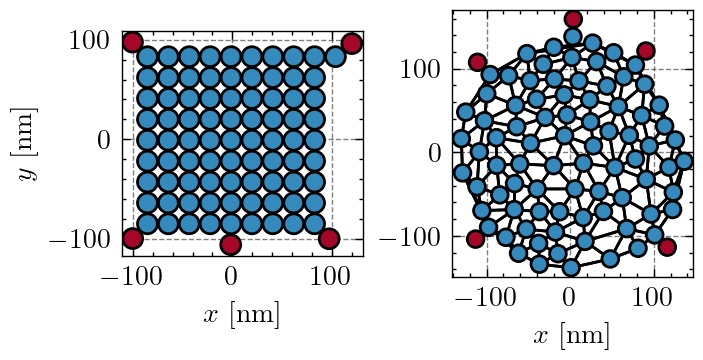

In [ ]:
G_lat           = lattice_net.get_graph()
pos_lat         = lattice_net.get_positions()
rad_lat         = lattice_net.get_radius()
net_topo_lat    = lattice_net.get_net_topology()

G_rng           = random_net.get_graph()
pos_rng         = random_net.get_positions()
rad_rng         = random_net.get_radius()
net_topo_rng    = random_net.get_net_topology()

fig     = plt.figure(dpi=200, layout='constrained')
ax      = fig.add_subplot(1,2,1)
fig,ax  = display_network(G_lat, pos_lat, rad_lat, net_topo_lat, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")
_       = ax.set_ylabel("$y$ [nm]")
ax      = fig.add_subplot(1,2,2)
fig,ax  = display_network(G_rng, pos_rng, rad_rng, net_topo_rng, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")

In [7]:
voltage_values = np.random.normal(size=len(electrode_pos)+1)

lattice_net.calc_capacitance_matrix()
lattice_net.calc_electrode_capacitance_matrix()
lattice_net.init_charge_vector(voltage_values)

c_mat   = lattice_net.get_capacitance_matrix()
c_e_mat = lattice_net.get_electrode_capacitance_matrix()
q_vec   = lattice_net.get_charge_vector()

print("Capacitance Matrix:\n", np.round(c_mat,2))
print("Electrode Capacitance Matrix:\n", np.round(c_e_mat,2))
print("Voltage Vector:\n", np.round(voltage_values,2))
print("Initial Charge Vector:\n", np.round(q_vec,2))

Capacitance Matrix:
 [[33.67 -2.56 -0.74 ... -0.13 -0.12 -0.11]
 [-2.56 36.7  -2.56 ... -0.14 -0.13 -0.12]
 [-0.74 -2.56 38.55 ... -0.15 -0.14 -0.13]
 ...
 [-0.13 -0.14 -0.15 ... 36.71 -2.56 -0.74]
 [-0.12 -0.13 -0.14 ... -2.56 34.15 -2.56]
 [-0.11 -0.12 -0.13 ... -0.74 -2.56 29.58]]
Electrode Capacitance Matrix:
 [[0.16 0.16 0.15 0.15 0.14 0.13 0.13 0.12 0.11 0.18 0.18 0.17 0.16 0.15
  0.14 0.14 0.13 0.12 0.21 0.2  0.19 0.18 0.17 0.16 0.15 0.14 0.13 0.24
  0.23 0.22 0.2  0.19 0.17 0.16 0.14 0.13 0.29 0.28 0.26 0.23 0.21 0.19
  0.17 0.15 0.14 0.37 0.34 0.3  0.26 0.23 0.2  0.18 0.16 0.15 0.51 0.44
  0.37 0.3  0.26 0.22 0.19 0.17 0.15 0.81 0.6  0.44 0.34 0.28 0.23 0.2
  0.17 0.16 2.56 0.8  0.51 0.37 0.29 0.24 0.21 0.18 0.16 0.14]
 [2.56 0.81 0.51 0.37 0.29 0.24 0.21 0.18 0.16 0.81 0.6  0.44 0.34 0.28
  0.23 0.2  0.18 0.16 0.51 0.44 0.37 0.3  0.26 0.22 0.19 0.17 0.15 0.37
  0.34 0.3  0.26 0.23 0.2  0.18 0.16 0.15 0.29 0.28 0.26 0.23 0.21 0.19
  0.17 0.15 0.14 0.24 0.23 0.22 0.2  0.19 0.17

# Networks with disorder

In [8]:
# Radius Disorder
r_mean, r_std       = 10.0, 2.0

# Lattice
N_x, N_y            = 9,9
electrode_pos       = [[0,N_y-1],[0,0],[N_x-1,0],[N_x//2,0],[N_x-1,N_y-1]]
lattice_net         = NanoparticleElectrostatic()

# Build Network and attach Electrodes
lattice_net.lattice_network(N_x, N_y)
lattice_net.add_electrodes_to_lattice_net(electrode_pos)
lattice_net.add_np_to_output()
lattice_net.init_nanoparticle_radius(mean_radius=r_mean, std_radius=r_std)
lattice_net.pack_planar_circles()

# Lattice
N_particles     = 81
electrode_pos   = [[-1,-1],[-1,1],[1,-1],[1,1],[0,1]]
random_net      = NanoparticleElectrostatic()

# Build Network and attach Electrodes
random_net.random_network(N_particles)
random_net.add_electrodes_to_random_net(electrode_pos)
random_net.add_np_to_output()
random_net.init_nanoparticle_radius(mean_radius=r_mean, std_radius=r_std)
random_net.pack_planar_circles()

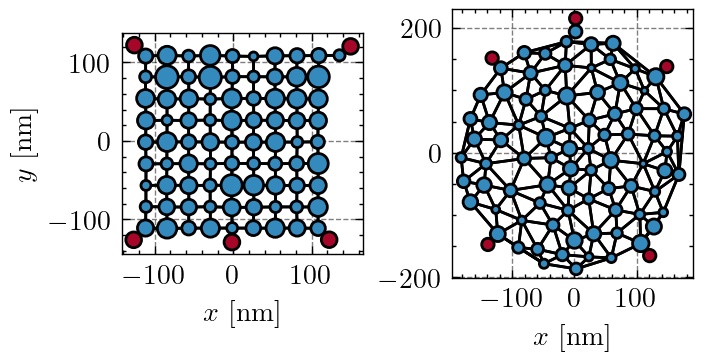

In [9]:
G_lat           = lattice_net.get_graph()
pos_lat         = lattice_net.get_positions()
rad_lat         = lattice_net.get_radius()
net_topo_lat    = lattice_net.get_net_topology()

G_rng           = random_net.get_graph()
pos_rng         = random_net.get_positions()
rad_rng         = random_net.get_radius()
net_topo_rng    = random_net.get_net_topology()

fig     = plt.figure(dpi=200, layout='constrained')
ax      = fig.add_subplot(1,2,1)
fig,ax  = display_network(G_lat, pos_lat, rad_lat, net_topo_lat, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")
_       = ax.set_ylabel("$y$ [nm]")
ax      = fig.add_subplot(1,2,2)
fig,ax  = display_network(G_rng, pos_rng, rad_rng, net_topo_rng, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")

In [10]:
voltage_values = np.random.normal(size=len(electrode_pos)+1)

random_net.calc_capacitance_matrix()
random_net.calc_electrode_capacitance_matrix()
random_net.init_charge_vector(voltage_values)

c_mat   = random_net.get_capacitance_matrix()
c_e_mat = random_net.get_electrode_capacitance_matrix()
q_vec   = random_net.get_charge_vector()

print("Capacitance Matrix:\n", np.round(c_mat,2))
print("Electrode Capacitance Matrix:\n", np.round(c_e_mat,2))
print("Voltage Vector:\n", np.round(voltage_values,2))
print("Initial Charge Vector:\n", np.round(q_vec,2))

Capacitance Matrix:
 [[25.76 -0.33 -0.43 ... -0.28 -0.38 -0.15]
 [-0.33 32.1  -0.3  ... -0.6  -0.32 -0.38]
 [-0.43 -0.3  21.69 ... -0.38 -0.21 -0.17]
 ...
 [-0.28 -0.6  -0.38 ... 23.98 -0.21 -0.32]
 [-0.38 -0.32 -0.21 ... -0.21 31.16 -0.15]
 [-0.15 -0.38 -0.17 ... -0.32 -0.15 23.22]]
Electrode Capacitance Matrix:
 [[0.19 0.14 0.13 0.14 0.15 0.32 0.09 0.11 0.05 0.16 0.1  0.08 0.12 0.1
  0.19 0.07 0.47 0.11 0.19 0.05 2.86 0.11 0.15 0.11 0.26 0.05 0.06 0.08
  0.11 0.35 0.07 0.15 0.2  0.19 0.1  0.09 0.31 0.33 0.12 0.16 0.24 0.2
  0.06 0.1  0.09 0.15 0.36 0.12 0.23 0.11 0.26 0.1  0.09 0.13 0.14 0.2
  0.17 0.07 0.19 0.1  0.09 0.12 0.13 0.07 0.08 0.09 0.2  0.17 0.19 0.09
  0.24 0.27 0.11 0.11 0.12 0.08 0.06 0.56 0.12 0.11 0.26 0.08]
 [0.24 0.29 0.52 0.09 0.29 0.14 0.08 0.16 0.08 0.14 0.12 0.09 0.21 0.11
  0.1  0.13 0.15 0.06 0.07 0.06 0.12 0.18 0.63 2.61 0.1  0.11 0.07 0.32
  0.1  0.09 0.09 0.14 0.13 0.16 0.17 0.24 0.08 0.08 0.07 0.1  0.1  0.18
  0.06 0.26 0.2  0.14 0.17 0.1  0.06 0.15 0.11 0

# Networks with two NP Types

In [11]:
# Lattice
N_x, N_y            = 9,9
electrode_pos       = [[0,N_y-1],[0,0],[N_x-1,0],[N_x//2,0],[N_x-1,N_y-1]]
lattice_net         = NanoparticleElectrostatic()

# Two NP Types
r_mean_1, r_std_1   = 10.0, 1.0
r_mean_2, r_std_2   = 20.0, 2.0
N_particles         = N_x * N_y
np_index_type_2     = np.random.choice(np.arange(N_particles),N_particles//3, replace=False)

# Build Network and attach Electrodes
lattice_net.lattice_network(N_x, N_y)
lattice_net.add_electrodes_to_lattice_net(electrode_pos)
lattice_net.add_np_to_output()
lattice_net.init_nanoparticle_radius(mean_radius=r_mean_1, std_radius=r_std_1)
lattice_net.update_nanoparticle_radius(np_index_type_2, mean_radius=r_mean_2, std_radius=r_std_2)
lattice_net.pack_planar_circles()

# Lattice
N_particles     = 81
electrode_pos   = [[-1,-1],[-1,1],[1,-1],[1,1],[0,1]]
random_net      = NanoparticleElectrostatic()

# Two NP Types
np_index_type_2 = np.random.choice(np.arange(N_particles),N_particles//3, replace=False)

# Build Network and attach Electrodes
random_net.random_network(N_particles)
random_net.add_electrodes_to_random_net(electrode_pos)
random_net.add_np_to_output()
random_net.init_nanoparticle_radius(mean_radius=r_mean_1, std_radius=r_std_1)
random_net.update_nanoparticle_radius(np_index_type_2, mean_radius=r_mean_2, std_radius=r_std_2)
random_net.pack_planar_circles()

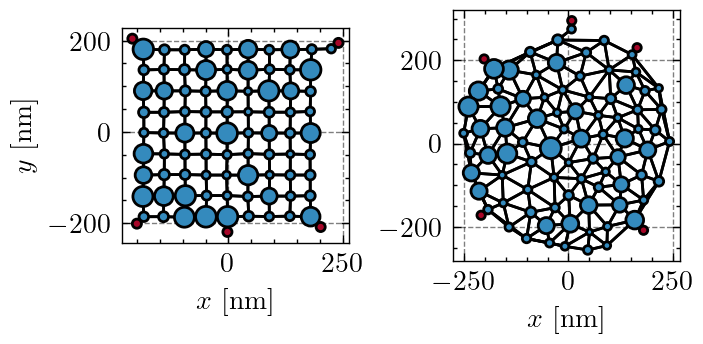

In [13]:
G_lat           = lattice_net.get_graph()
pos_lat         = lattice_net.get_positions()
rad_lat         = lattice_net.get_radius()
net_topo_lat    = lattice_net.get_net_topology()

G_rng           = random_net.get_graph()
pos_rng         = random_net.get_positions()
rad_rng         = random_net.get_radius()
net_topo_rng    = random_net.get_net_topology()

fig     = plt.figure(dpi=200, layout='constrained')
ax      = fig.add_subplot(1,2,1)
fig,ax  = display_network(G_lat, pos_lat, rad_lat, net_topo_lat, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")
_       = ax.set_ylabel("$y$ [nm]")
ax      = fig.add_subplot(1,2,2)
fig,ax  = display_network(G_rng, pos_rng, rad_rng, net_topo_rng, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")

In [69]:
# Lattice
N_x, N_y            = 9,9
electrode_pos       = [[(N_x-1)//2,0],[0,0],[N_x-1,0],
                   [0,(N_y-1)//2],[N_x-1,(N_y-1)//2],
                   [0,N_y-1],[N_x-1,N_y-1],[(N_x-1)//2,N_y-1]]
lattice_net         = NanoparticleElectrostatic()

# Two NP Types
r_mean_2    = 1e2
N_particles = N_x * N_y

# Build Network and attach Electrodes
lattice_net.lattice_network(N_x, N_y)
lattice_net.add_electrodes_to_lattice_net(electrode_pos)
lattice_net.add_np_to_output()
lattice_net.init_nanoparticle_radius()
lattice_net.update_nanoparticle_radius([81], mean_radius=r_mean_2)
lattice_net.pack_planar_circles(alpha=0.05, tol=1e-6)


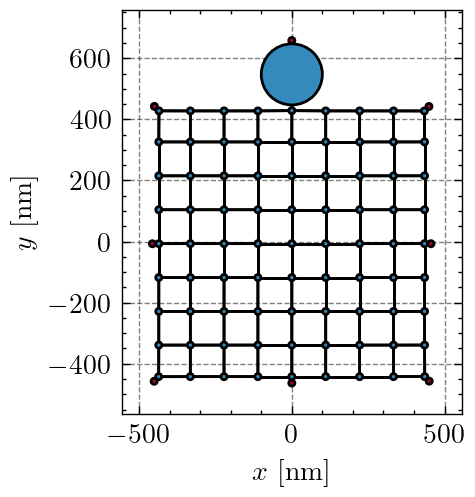

In [70]:
G_lat           = lattice_net.get_graph()
pos_lat         = lattice_net.get_positions()
rad_lat         = lattice_net.get_radius()
net_topo_lat    = lattice_net.get_net_topology()

fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
fig,ax  = display_network(G_lat, pos_lat, rad_lat, net_topo_lat, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")
_       = ax.set_ylabel("$y$ [nm]")

In [76]:
def force_directed_packing(
    initial_positions: dict,
    radii_pos_keys: np.ndarray,
    radius_neg_keys: float,
    min_surface_dist: float = 0.0,
    max_iter: int = 2000,
    k_repel: float = 1.0,
    k_attract: float = 0.01,
    step_size: float = 0.05,
    convergence_threshold: float = 1e-5
) -> dict:
    """
    Arranges a network of spheres with positive and negative keys using a
    force-directed layout.

    - Spheres with positive keys (0, 1, ...) get their radii from `radii_pos_keys`.
    - Spheres with negative keys (-1, -2, ...) all have the same radius, `radius_neg_keys`.

    Args:
        initial_positions (dict): Dict mapping sphere index {idx: np.array([x, y]), ...}.
                                  Can contain positive and negative integer keys.
        radii_pos_keys (np.ndarray): NumPy array where radii_pos_keys[i] is the radius
                                     for sphere with positive key `i`.
        radius_neg_keys (float): The single, constant radius for all spheres with
                                 negative keys.
        min_surface_dist (float): The minimum required distance between surfaces.
        max_iter (int): The maximum number of simulation steps.
        k_repel (float): Spring constant for the repulsive force.
        k_attract (float): Spring constant for the attractive force.
        step_size (float): Factor determining how much spheres move in each step.
        convergence_threshold (float): Threshold for early stopping if the system is stable.

    Returns:
        dict: A dictionary with the final, updated positions for all spheres.
    """
    if not initial_positions:
        return {}
        
    positions = {idx: np.copy(pos) for idx, pos in initial_positions.items()}
    num_spheres = len(positions)
    sphere_indices = list(positions.keys())

    # The center of attraction is the mean of all initial positions
    initial_center_of_mass = np.mean(np.array(list(positions.values())), axis=0)
    print(f"Starting simulation for {num_spheres} total spheres...")
    print(f"Center of attraction: {initial_center_of_mass}")

    for i in range(max_iter):
        net_forces = {idx: np.zeros(2) for idx in sphere_indices}
        total_movement = 0.0

        # 1. Calculate Repulsive Forces
        for j in range(num_spheres):
            for k in range(j + 1, num_spheres):
                idx1 = sphere_indices[j]
                idx2 = sphere_indices[k]
                
                pos1, pos2 = positions[idx1], positions[idx2]
                
                # --- KEY MODIFICATION: Get radius based on key sign ---
                radius1 = radii_pos_keys[idx1] if idx1 >= 0 else radius_neg_keys
                radius2 = radii_pos_keys[idx2] if idx2 >= 0 else radius_neg_keys
                
                vec = pos2 - pos1
                dist = np.linalg.norm(vec)
                target_dist = radius1 + radius2 + min_surface_dist
                
                if dist < target_dist and dist > 1e-8:
                    overlap = target_dist - dist
                    force_magnitude = k_repel * overlap
                    direction = vec / dist
                    force_vec = force_magnitude * direction
                    net_forces[idx1] -= force_vec
                    net_forces[idx2] += force_vec

        # 2. Calculate Attractive Forces (acts on all spheres)
        for idx in sphere_indices:
            vec_to_center = initial_center_of_mass - positions[idx]
            force_vec = k_attract * vec_to_center
            net_forces[idx] += force_vec
            
        # 3. Update Positions
        for idx in sphere_indices:
            force = net_forces[idx]
            movement_vector = step_size * force
            positions[idx] += movement_vector
            total_movement += np.linalg.norm(movement_vector)

        # 4. Check for Convergence
        if total_movement < convergence_threshold:
            print(f"Converged after {i+1} iterations.")
            break
    else:
        print(f"Reached max iterations ({max_iter}).")
        
    return positions

def force_directed_packing_guaranteed(
    initial_positions: dict,
    radii_pos_keys: np.ndarray,
    radius_neg_keys: float,
    min_surface_dist: float = 0.0,
    max_iter: int = 2000,
    resolution_steps: int = 10, # New parameter for the hard push
    k_repel: float = 1.0,
    k_attract: float = 0.01,
    step_size: float = 0.05,
    convergence_threshold: float = 1e-5
) -> dict:
    """
    Arranges spheres using a force-directed layout with a guaranteed
    non-overlapping final state.

    This function adds a "hard push" collision resolution step after each
    force-based update to ensure the minimum distance constraint is always met.

    Args:
        initial_positions (dict): ... (same as before)
        radii_pos_keys (np.ndarray): ... (same as before)
        radius_neg_keys (float): ... (same as before)
        min_surface_dist (float): The minimum required distance between surfaces.
        max_iter (int): The maximum number of simulation steps.
        resolution_steps (int): How many times to run the collision resolution
                                step per main iteration. Important for stability.
        k_repel (float): Spring constant for the repulsive force.
        k_attract (float): Spring constant for the attractive force.
        step_size (float): Factor determining how much spheres move.
        convergence_threshold (float): Threshold for early stopping.

    Returns:
        dict: A dictionary with the final, updated positions for all spheres.
    """
    if not initial_positions:
        return {}
        
    positions = {idx: np.copy(pos) for idx, pos in initial_positions.items()}
    num_spheres = len(positions)
    sphere_indices = list(positions.keys())

    initial_center_of_mass = np.mean(np.array(list(positions.values())), axis=0)
    print(f"Starting GUARANTEED simulation for {num_spheres} total spheres...")

    for i in range(max_iter):
        # Steps 1, 2, and 3 are largely the same: calculate forces and update positions
        net_forces = {idx: np.zeros(2) for idx in sphere_indices}
        total_movement = 0.0

        # 1. & 2. Calculate Repulsive and Attractive Forces
        # (This part is identical to the previous function)
        for j in range(num_spheres):
            # Attractive Force (calculated once per sphere)
            vec_to_center = initial_center_of_mass - positions[sphere_indices[j]]
            net_forces[sphere_indices[j]] += k_attract * vec_to_center
            
            # Repulsive Forces
            for k in range(j + 1, num_spheres):
                idx1, idx2 = sphere_indices[j], sphere_indices[k]
                pos1, pos2 = positions[idx1], positions[idx2]
                radius1 = radii_pos_keys[idx1] if idx1 >= 0 else radius_neg_keys
                radius2 = radii_pos_keys[idx2] if idx2 >= 0 else radius_neg_keys
                
                vec = pos2 - pos1
                dist = np.linalg.norm(vec)
                target_dist = radius1 + radius2 + min_surface_dist
                
                if dist < target_dist and dist > 1e-8:
                    overlap = target_dist - dist
                    force_magnitude = k_repel * overlap
                    direction = vec / dist
                    force_vec = force_magnitude * direction
                    net_forces[idx1] -= force_vec
                    net_forces[idx2] += force_vec

        # 3. Update Positions based on soft forces
        for idx in sphere_indices:
            movement_vector = step_size * net_forces[idx]
            positions[idx] += movement_vector
            total_movement += np.linalg.norm(movement_vector)
            
        # --- 4. Hard Constraint Projection (The "Hard Push" Step) ---
        # This is the new, crucial part.
        for _ in range(resolution_steps):
            for j in range(num_spheres):
                for k in range(j + 1, num_spheres):
                    idx1, idx2 = sphere_indices[j], sphere_indices[k]
                    pos1, pos2 = positions[idx1], positions[idx2]
                    radius1 = radii_pos_keys[idx1] if idx1 >= 0 else radius_neg_keys
                    radius2 = radii_pos_keys[idx2] if idx2 >= 0 else radius_neg_keys

                    vec = pos2 - pos1
                    dist = np.linalg.norm(vec)
                    target_dist = radius1 + radius2 + min_surface_dist

                    if dist < target_dist and dist > 1e-8:
                        # Spheres are overlapping, so we push them apart
                        overlap = target_dist - dist
                        direction = vec / dist
                        
                        # Move each sphere by half the overlap distance
                        positions[idx1] -= direction * (overlap / 2)
                        positions[idx2] += direction * (overlap / 2)

        # 5. Check for Convergence
        if total_movement < convergence_threshold:
            print(f"Converged after {i+1} iterations.")
            break
    else:
        print(f"Reached max iterations ({max_iter}).")
        
    return positions


In [77]:
pos_new = force_directed_packing_guaranteed(pos_lat, rad_lat, 10.0, 1, max_iter=5000, k_repel=1, k_attract=0.01)

Starting GUARANTEED simulation for 90 total spheres...
Reached max iterations (5000).


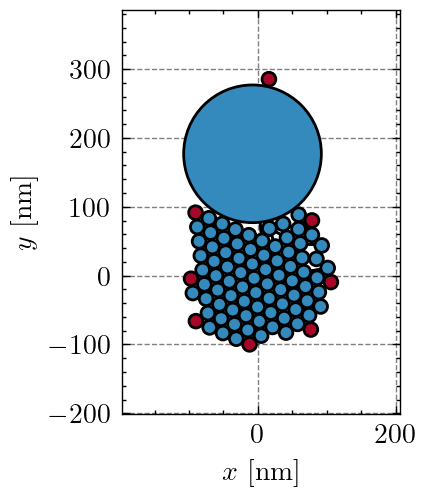

In [78]:
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
fig,ax  = display_network(G_lat, pos_new, rad_lat, net_topo_lat, fig=fig, ax=ax)
_       = ax.set_xlabel("$x$ [nm]")
_       = ax.set_ylabel("$y$ [nm]")
# ax.set_xlim(-1000,1000)
# ax.set_ylim(-1000,1000)